# Netflix Data per Country
Questions I'm exploring:
1. How do Netflix subscription counts and revenue differ by country?
2. Does genre popularity differ by country?

# Subscriber Count by Country

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
sub_count_path = "Data Sets/Subscriber count and revenue.csv"
population_path = "Data Sets/country population.csv"

# Read the data sets
sub_count_revenue = pd.read_csv(sub_count_path)
population_df = pd.read_csv(population_path)

In [2]:
#Make new dataframe for average number of subscribers for each country
subcount = sub_count_revenue[["Country", "# of Subscribers Q1 2021", "# of Subscribers Q2 2021", "# of Subscribers Q3 2021 (Estimate)", "# of Subscribers Q4 2021 (Estimate)"]]
#rename columns
subscriber_df = subcount.rename(columns={"# of Subscribers Q1 2021": "Subscribers Q1", 
                         "# of Subscribers Q2 2021": "Subscribers Q2", 
                         "# of Subscribers Q3 2021 (Estimate)": "Subscribers Q3", 
                         "# of Subscribers Q4 2021 (Estimate)": "Subscribers Q4"})
subscriber_df.head()


,Country,Subscribers Q1,Subscribers Q2,Subscribers Q3,Subscribers Q4
0,Argentina,4968423,5069282,5154101,5240340
1,Australia,6169026,6405917,6513101,6622078
2,Austria,927420,930017,945578,961399
3,Belgium,1639040,1643629,1671131,1699092
4,Brazil,17858800,18221334,18526213,18836193


In [3]:
#find average for each country
average_sub = subscriber_df.mean(axis=1)
subscriber_df['Average Subscribers'] = average_sub
subscriber_df.head()

/var/folders/sq/ltp2rhh15gx_8tnv3090f6ww0000gn/T/ipykernel_75765/4187804314.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  average_sub = subscriber_df.mean(axis=1)


,Country,Subscribers Q1,Subscribers Q2,Subscribers Q3,Subscribers Q4,Average Subscribers
0,Argentina,4968423,5069282,5154101,5240340,5108036.5
1,Australia,6169026,6405917,6513101,6622078,6427530.5
2,Austria,927420,930017,945578,961399,941103.5
3,Belgium,1639040,1643629,1671131,1699092,1663223.0
4,Brazil,17858800,18221334,18526213,18836193,18360635.0


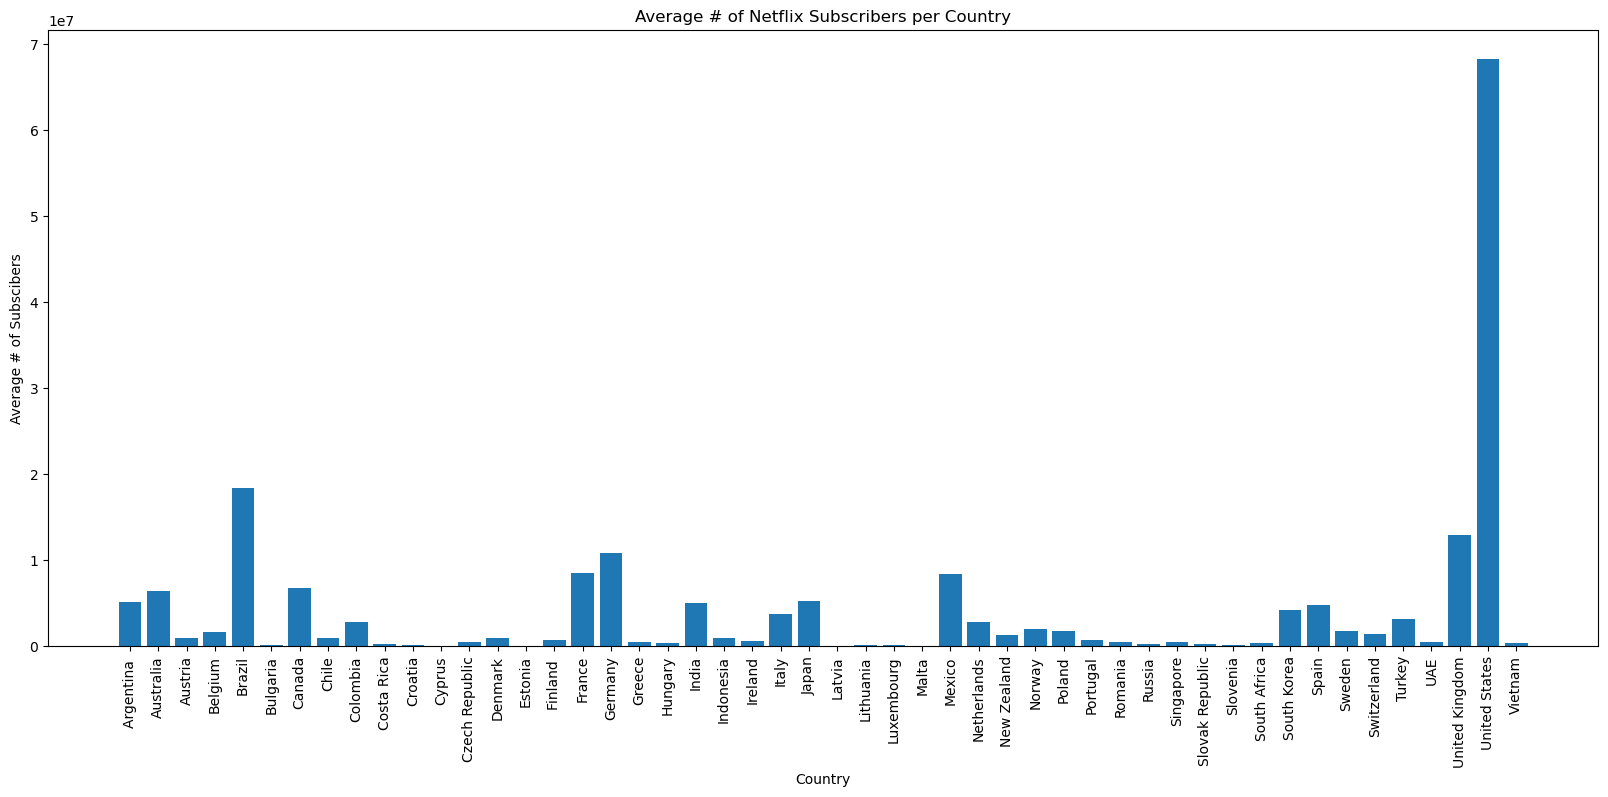

In [4]:
#Bar chart with subscriber counts
countries = subscriber_df['Country']
subscribers = subscriber_df['Average Subscribers']

plt.figure(figsize=(20,8))
plt.bar(countries, subscribers, align = "center")
tick_locations = [value for value in countries]
plt.xticks(tick_locations, countries, rotation = "vertical")
plt.xlabel("Country")
plt.ylabel("Average # of Subscibers")
plt.title("Average # of Netflix Subscribers per Country")

plt.show()

In [5]:
#Find top 5 countries
top_subcount = subscriber_df.sort_values(["Average Subscribers"], ascending=False)
top_subcount.head(5)

,Country,Subscribers Q1,Subscribers Q2,Subscribers Q3,Subscribers Q4,Average Subscribers
48,United States,67670924,67278433,68404135,69548673,68225541.25
4,Brazil,17858800,18221334,18526213,18836193,18360635.00
47,United Kingdom,12716400,12752006,12965372,13182309,12904021.75
17,Germany,10666560,10696426,10875399,11057366,10823937.75
16,France,8344620,8367985,8507998,8650354,8467739.25


USA dominates subscriber count with approximately 68 million subscibers. The second highest is Brazil with over 18 million. Then the UK just shy of 13 million. 

In [6]:
#Analyze subscribers by country population
#Merge dataframe
merged_df = pd.merge(subscriber_df, population_df, on="Country")
subscriber_population_df=merged_df[["Country", "Population", "Average Subscribers"]]
subscriber_population_df.head()

,Country,Population,Average Subscribers
0,Argentina,45794179,5108036.5
1,Australia,26439111,6427530.5
2,Austria,8958960,941103.5
3,Belgium,11686140,1663223.0
4,Brazil,216422446,18360635.0


In [7]:
#Find percent subscribers per country
countries = subscriber_population_df['Country']
subs = subscriber_population_df['Average Subscribers']
pop = subscriber_population_df['Population']

percent = subs/pop*100

percent_population_df = pd.DataFrame({"Country": countries,
                                     "Percent Subscribers": percent})
#percent_population_df["Percent Subscribers"] = percent_population_df["Percent Subscribers"].map("{:,.2f}%".format)

percent_population_df.head()

,Country,Percent Subscribers
0,Argentina,11.154336
1,Australia,24.310691
2,Austria,10.504607
3,Belgium,14.232441
4,Brazil,8.483702


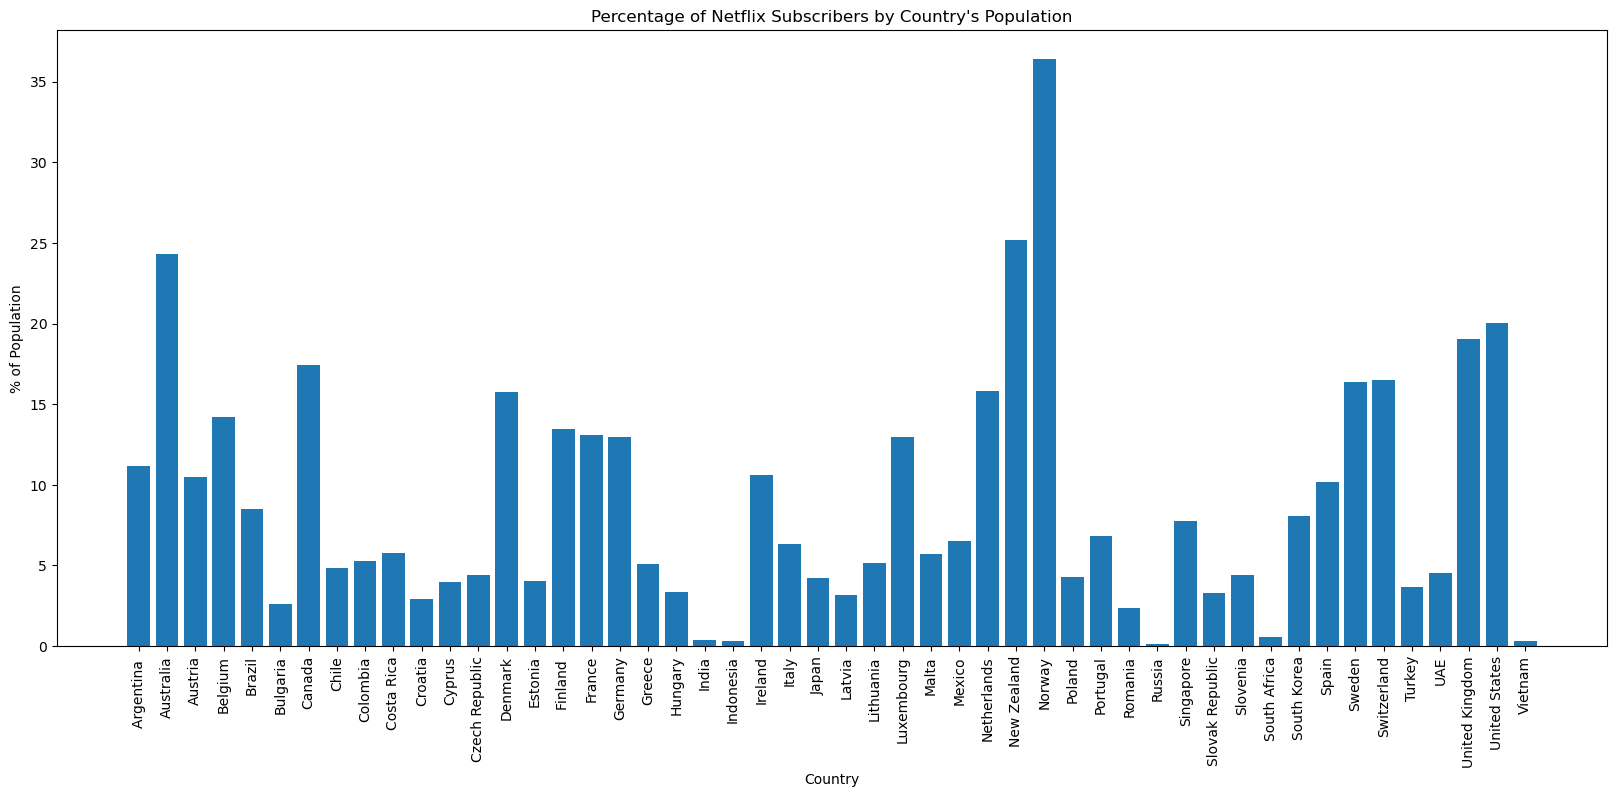

In [8]:
#Create Chart
countries = percent_population_df['Country']
subscribers = percent_population_df['Percent Subscribers']

plt.figure(figsize=(20,8))
plt.bar(countries, subscribers, align = "center")
tick_locations = [value for value in countries]
plt.xticks(tick_locations, countries, rotation = "vertical")
plt.xlabel("Country")
plt.ylabel("% of Population")
plt.title("Percentage of Netflix Subscribers by Country's Population")

plt.show()

When changed to percent subscribers by country's population, there's a significant difference to the previous chart. The US and UK are in the top 5 again but drop in position. From place 1 and 3 to 4 and 5. Norway is the highest at 36%. 

In [34]:
top_percent = percent_population_df.sort_values(["Percent Subscribers"], ascending=False)
top_percent.head(5)

,Country,Percent Subscribers
32,Norway,36.380988
31,New Zealand,25.174002
1,Australia,24.310691
48,United States,20.066539
47,United Kingdom,19.050238


# Netflix Revenue by Country

In [9]:
#Make a new dataframe for revenue by country
quarterly_revenue_df = sub_count_revenue[["Country", "Q1 2021 Revenue $", "Q2 2021 Revenue $", "Q3 2021 Revenue $ (Estimate)", "Q4 2021 Revenue $ (Estimate)"]]
#rename columns
total_revenue_df = quarterly_revenue_df.rename(columns={"Q1 2021 Revenue $": "Q1 Revenue",
                           "Q2 2021 Revenue $": "Q2 Revenue",
                           "Q3 2021 Revenue $ (Estimate)": "Q3 Revenue" ,
                           "Q4 2021 Revenue $ (Estimate)": "Q4 Revenue"})
total_revenue_df.head()

,Country,Q1 Revenue,Q2 Revenue,Q3 Revenue,Q4 Revenue
0,Argentina,110149942,114058849,115967282,117907646
1,Australia,179703740,187180896,190312806,193497120
2,Austria,32162926,32531987,33076312,33629745
3,Belgium,56841907,57494153,58456146,59434234
4,Brazil,395929594,409980005,416839790,423814354


In [10]:
#Find yearly revenue and add to dataframe
yearly_revenue = total_revenue_df.sum(axis=1)
total_revenue_df['Yearly Revenue'] = yearly_revenue
total_revenue_df.head()

/var/folders/sq/ltp2rhh15gx_8tnv3090f6ww0000gn/T/ipykernel_75765/1500935974.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  yearly_revenue = total_revenue_df.sum(axis=1)


,Country,Q1 Revenue,Q2 Revenue,Q3 Revenue,Q4 Revenue,Yearly Revenue
0,Argentina,110149942,114058849,115967282,117907646,458083719
1,Australia,179703740,187180896,190312806,193497120,750694562
2,Austria,32162926,32531987,33076312,33629745,131400970
3,Belgium,56841907,57494153,58456146,59434234,232226440
4,Brazil,395929594,409980005,416839790,423814354,1646563743


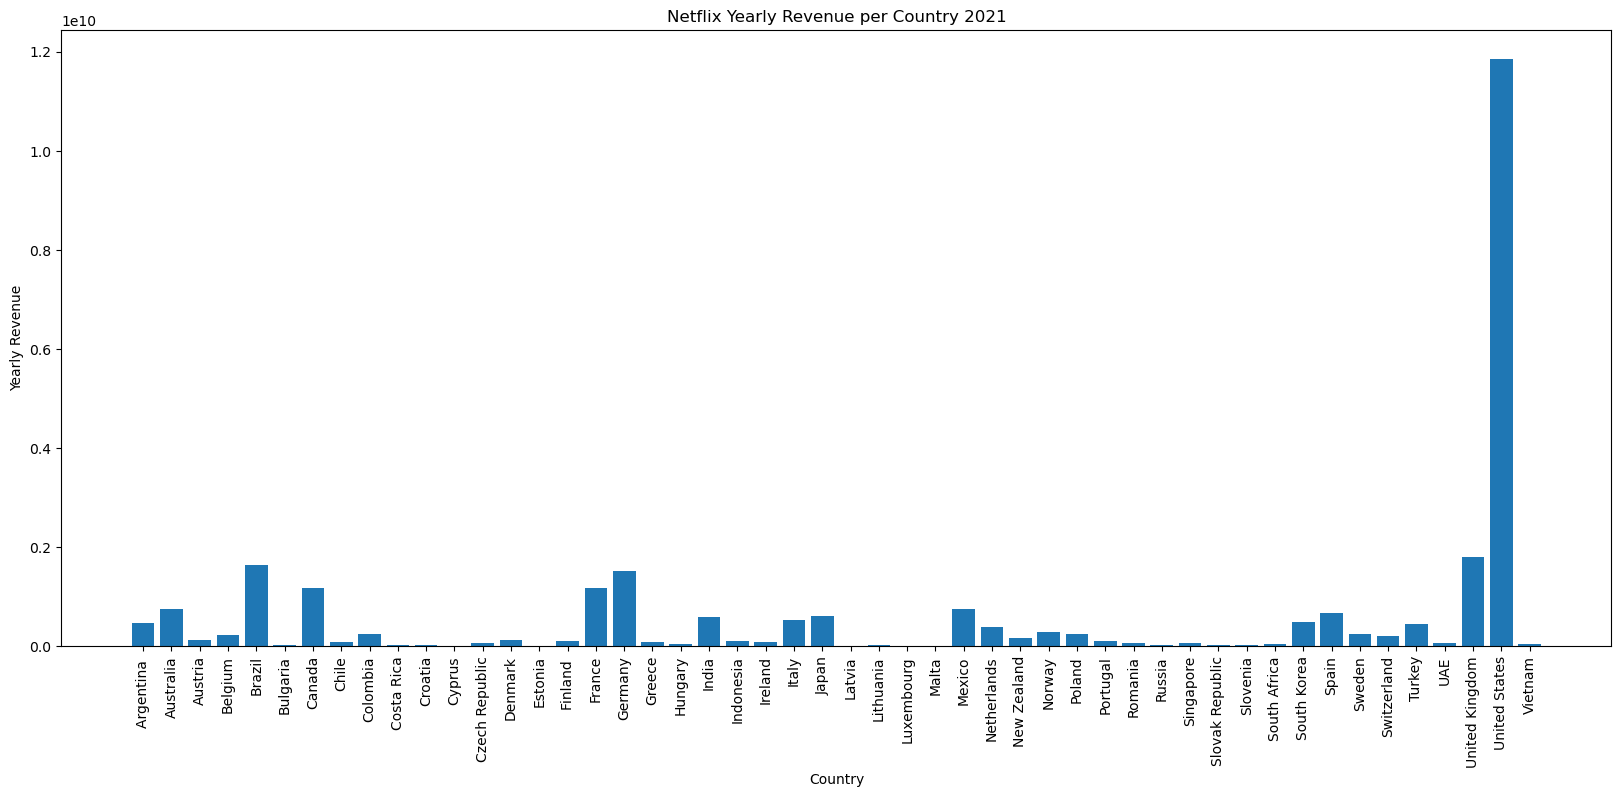

In [11]:
#Create Chart
countries = total_revenue_df['Country']
revenue = total_revenue_df['Yearly Revenue']

plt.figure(figsize=(20,8))
plt.bar(countries, revenue, align = "center")
tick_locations = [value for value in countries]
plt.xticks(tick_locations, countries, rotation = "vertical")
plt.xlabel("Country")
plt.ylabel("Yearly Revenue")
plt.title("Netflix Yearly Revenue per Country 2021")

plt.show()

In [12]:
#find total yearly revenue
total_yearly_revenue = total_revenue_df['Yearly Revenue'].sum()
print(f"Total yearly revenue for Netflix: ${total_yearly_revenue}")

Total yearly revenue for Netflix: $27806468262


In [13]:
#Find top 5 countries
top_countries = total_revenue_df.sort_values(["Yearly Revenue"], ascending=False)
top_countries.head(5)

,Country,Q1 Revenue,Q2 Revenue,Q3 Revenue,Q4 Revenue,Yearly Revenue
48,United States,2892932001,2934685232,2983788385,3033713132,11845118750
47,United Kingdom,441004752,446065167,453528729,461117172,1801715820
4,Brazil,395929594,409980005,416839790,423814354,1646563743
17,Germany,369916301,374160994,380421456,386786668,1511285419
16,France,289391422,292712113,297609772,302589379,1182302686


The US contributes the greatest to the yearly Netflix revenue at over $11 billion. Note that these are the same top five countries as the top five by subscriber counts. The difference being that the UK and Brazil swapped places, which could be due to varying subscription plan prices in each country. 

# Genre Popularity

In [14]:
#import file
top_10_path = "Data Sets/Top 10 by country.csv"

# Read the data set
top_10 = pd.read_csv(top_10_path)
filtered_top_10 = top_10[["country_name", "category", "show_title"]]
filtered_top_10

,country_name,category,show_title
0,Argentina,Films (English),Red Notice
1,Argentina,Films (English),Love Hard
2,Argentina,Films (English),Yara
3,Argentina,Films (English),211
4,Argentina,Films (English),The Harder They Fall
...,...,...,...
37595,Vietnam,TV (English),Reply 1988
37596,Vietnam,TV (English),"Nevertheless,"
37597,Vietnam,TV (English),Too Hot to Handle
37598,Vietnam,TV (English),Record of Ragnarok


In [15]:
#make a dataframe for just films
films_df = filtered_top_10.loc[filtered_top_10['category']=='Films (English)']
films_df

,country_name,category,show_title
0,Argentina,Films (English),Red Notice
1,Argentina,Films (English),Love Hard
2,Argentina,Films (English),Yara
3,Argentina,Films (English),211
4,Argentina,Films (English),The Harder They Fall
...,...,...,...
37585,Vietnam,Films (English),Camellia Sisters
37586,Vietnam,Films (English),12 Strong
37587,Vietnam,Films (English),Glitch
37588,Vietnam,Films (English),Pokémon Detective Pikachu


In [16]:
repeat_films = films_df['show_title'].unique()
print(len(repeat_films))

1124


In [18]:
#Use OMDB to pull genre's for each film. Used api_exceptions_solution as example
import requests
import json
from config import api_key

url = f"http://www.omdbapi.com/?apikey={api_key}&t="
movies = repeat_films
titles = []
genres = []

for movie in movies:
    response = requests.get(url + movie).json()
    
    try:
        titles.append(response['Title'])
        genres.append(response['Genre'])
        print(f'{response["Title"]}: {response["Genre"]}')
        
    except:
        print("Title not found")
        pass



Red Notice: Action, Comedy, Thriller
Love Hard: Comedy, Romance
Yara: Crime, Drama, Thriller
211: Action, Drama, Thriller
The Harder They Fall: Action, Drama, Western
Army of Thieves: Action, Comedy, Crime
7 Prisoners: Crime, Drama
Father Christmas Is Back: Comedy
Just Go with It: Comedy, Romance
Amina: Action, Adventure, Biography
The Girl in the Spider's Web: Action, Crime, Drama
Title not found
Army of the Dead: Action, Crime, Drama
Only Mine: Drama, Mystery, Thriller
Hypnotic: Mystery, Thriller
Final Score: Action, Drama, Thriller
A Dog's Journey: Adventure, Comedy, Drama
Night Teeth: Action, Crime, Drama
Stuck Together: Comedy
The Forgotten Battle: Drama, War
Venom: Action, Adventure, Sci-Fi
In for a Murder: Comedy, Thriller
The Trip: Action, Comedy, Horror
Street Kings: Action, Crime, Thriller
What Happens in Vegas: Comedy, Romance
Gran Torino: Drama
The Four of Us: Comedy, Drama, Romance
My Brother, My Sister: Drama
Ma: Horror, Mystery, Thriller
The Guilty: Crime, Drama, Thrille

Man of Tai Chi: Action, Drama
The November Man: Action, Thriller
Along Came a Spider: Drama, Thriller
Grown Ups 2: Comedy
Rampage: Action, Adventure, Sci-Fi
The Sum of All Fears: Action, Drama, Thriller
The Longest Yard: Comedy, Crime, Sport
Legally Blonde: Comedy, Romance
White House Down: Action, Drama, Thriller
Tomb Raider: Action, Adventure, Fantasy
The Physician: Adventure, Drama, History
Title not found
Ready Player One: Action, Adventure, Sci-Fi
The Angry Birds Movie 2: Animation, Action, Adventure
Just Mercy: Biography, Crime, Drama
Shiny_Flakes: The Teenage Drug Lord: Documentary, Biography, Crime
The Good Liar: Crime, Drama, Mystery
The Kissing Booth: Comedy, Romance
The Kissing Booth 2: Comedy, Romance
Creed II: Action, Drama, Sport
Looney Tunes: Back in Action: Animation, Adventure, Comedy
Doctor Sleep: Drama, Fantasy, Horror
Once Upon a Time in Hollywood: Comedy, Drama
Homefront: Action, Crime, Thriller
The Magnificent Seven: Action, Adventure, Drama
Ghost Rider: Action, F

Hubie Halloween: Comedy, Horror, Mystery
Hellboy: Action, Adventure, Fantasy
The General's Daughter: Crime, Drama, Mystery
Despicable Me 2: Animation, Adventure, Comedy
Despicable Me: Animation, Adventure, Comedy
Dark Shadows: Comedy, Fantasy, Horror
The Ice Road: Action, Adventure, Thriller
Knock Knock: Crime, Drama, Thriller
The Poison Rose: Crime, Mystery, Thriller
The Wolf of Wall Street: Biography, Comedy, Crime
Code 8: Action, Crime, Drama
Stardust: Adventure, Family, Fantasy
Edge of Tomorrow: Action, Adventure, Sci-Fi
Straight Outta Compton: Biography, Drama, History
Yesterday: Comedy, Fantasy, Music
The Last Castle: Action, Drama, Thriller
The Lego Movie: Animation, Action, Adventure
Title not found
The Equalizer: Action, Crime, Thriller
Double Jeopardy: Crime, Drama, Mystery
Rocketman: Biography, Drama, Music
Bob Ross: Happy Accidents, Betrayal & Greed: Documentary
Wrath of Man: Action, Crime, Thriller
The Vault: Action, Adventure, Thriller
Inside Man: Crime, Drama, Mystery
Un

Man in Love: Drama, Romance
Title not found
Soekarno: Biography, Drama, History
The Hitman's Bodyguard: Action, Comedy, Crime
Ali: Biography, Drama, Sport
Deep: Drama, Mystery, Sci-Fi
Deck the Halls: Comedy, Family
Out of Death: Crime, Thriller
Ransom: Action, Crime, Thriller
Dark Waters: Biography, Drama, History
The Next Three Days: Action, Crime, Drama
Falling for Figaro: Comedy, Romance
The First Wives Club: Comedy
Hotel Transylvania: Animation, Adventure, Comedy
Luce: Drama, Mystery, Thriller
Spider-Man 3: Action, Adventure, Sci-Fi
Shazam!: Action, Adventure, Comedy
Office Christmas Party: Comedy
The Amazing Spider-Man: Action, Adventure, Sci-Fi
Pain & Gain: Action, Comedy, Crime
Papillon: Biography, Crime, Drama
Django Unchained: Drama, Western
Shot Caller: Crime, Drama, Thriller
The Blind Side: Biography, Drama, Sport
Fear of Rain: Drama, Horror, Thriller
Something's Gotta Give: Comedy, Drama, Romance
The Lego Movie 2: The Second Part: Animation, Action, Adventure
The Mule: Crim

Boy: Comedy, Drama
Infamous: Biography, Crime, Drama
The Missing: Adventure, Drama, Thriller
Captive State: Action, Horror, Sci-Fi
The SpongeBob Movie: Sponge Out of Water: Animation, Adventure, Comedy
Omo Ghetto: The Saga: Action, Adventure, Comedy
Alter Ego: Drama, Romance
Special Jollof: Drama
Gone: Action, Adventure, Mystery
Swallow: Drama, Thriller
Jupiter Ascending: Action, Adventure, Sci-Fi
King of Boys: Crime, Drama
Shadow Parties: Action
The Ghost and the Tout: Comedy, Fantasy
Quam's Money: Comedy, Crime
Nneka the Pretty Serpent: Horror, Mystery
Kambili: The Whole 30 Yards: Romance
Unroyal: Comedy, Romance
Slay: Comedy
Space Station 76: Comedy, Drama, Sci-Fi
Brother Jekwu: Comedy
Ijé: The Journey: Drama
2 Weeks in Lagos: Romance
Day of Destiny: Adventure, Drama, Sci-Fi
Sanitation Day: Thriller
RattleSnake: The Ahanna Story: Drama
Finding Hubby: Drama, Romance
Last Request: Short
Deranged: Drama, Horror, Thriller
Voiceless: Thriller
A Way Back Home: Drama
The Last of the Mohica

In [19]:
movie_genre = pd.DataFrame({
    'show_title': titles,
    'genre(s)': genres
})
movie_genre.head()
#180 titles were not found out of the 1124 film titles

,show_title,genre(s)
0,Red Notice,"Action, Comedy, Thriller"
1,Love Hard,"Comedy, Romance"
2,Yara,"Crime, Drama, Thriller"
3,211,"Action, Drama, Thriller"
4,The Harder They Fall,"Action, Drama, Western"


In [20]:
genres_country = pd.merge(films_df, movie_genre, on="show_title")
organized_genres_country=genres_country.sort_values('country_name')
organized_genres_country

,country_name,category,show_title,genre(s)
0,Argentina,Films (English),Red Notice,"Action, Comedy, Thriller"
8643,Argentina,Films (English),The Water Man,"Adventure, Drama, Family"
8594,Argentina,Films (English),Rust Creek,"Crime, Drama, Thriller"
8593,Argentina,Films (English),Rust Creek,"Crime, Drama, Thriller"
8571,Argentina,Films (English),Penguin Bloom,"Biography, Drama"
...,...,...,...,...
12703,Vietnam,Films (English),Deep Impact,"Action, Drama, Sci-Fi"
14079,Vietnam,Films (English),Sniper: Assassin's End,"Action, Thriller"
10260,Vietnam,Films (English),Nightbooks,"Family, Fantasy, Horror"
14080,Vietnam,Films (English),Sniper: Assassin's End,"Action, Thriller"


In [21]:
#split the genres into separate columns
# new data frame with split value columns
split = organized_genres_country["genre(s)"].str.split(",", n = 3, expand = True)

# making separate genre columns from new data frame
#Needed 4 new columns because 14 of the titles had 4 genres listed
organized_genres_country["Genre 1"]= split[0]
organized_genres_country["Genre 2"]= split[1]
organized_genres_country["Genre 3"]= split[2]
organized_genres_country["Genre 4"]= split[3]

# Dropping old Name columns
organized_genres_country.drop(columns =["genre(s)"], inplace = True)
 
# df display
organized_genres_country.head()

,country_name,category,show_title,Genre 1,Genre 2,Genre 3,Genre 4
0,Argentina,Films (English),Red Notice,Action,Comedy,Thriller,None
8643,Argentina,Films (English),The Water Man,Adventure,Drama,Family,None
8594,Argentina,Films (English),Rust Creek,Crime,Drama,Thriller,None
8593,Argentina,Films (English),Rust Creek,Crime,Drama,Thriller,None
8571,Argentina,Films (English),Penguin Bloom,Biography,Drama,None,None


In [33]:
#Overall number of times the genre is listed
genre_counts = []
g1 = organized_genres_country['Genre 1'].value_counts()
genre_counts.append(g1)
g2 = organized_genres_country['Genre 2'].value_counts()
genre_counts.append(g2)
g3 = organized_genres_country['Genre 3'].value_counts()
genre_counts.append(g3)
g4 = organized_genres_country['Genre 4'].value_counts()
genre_counts.append(g4)
genre_counts

[Action         7162
 Comedy         3329
 Animation      1829
 Drama          1582
 Crime           811
 Adventure       529
 Biography       355
 Horror          331
 Documentary     182
 Mystery         148
 Short           122
 Family          110
 Thriller         53
 Romance          14
 Fantasy          10
 Sci-Fi            2
 Musical           1
 Name: Genre 1, dtype: int64,
  Adventure    3989
  Drama        3853
  Crime        2092
  Romance      1654
  Comedy       1043
  Thriller      791
  Fantasy       490
  Mystery       465
  Action        459
  Horror        312
  War           241
  Sci-Fi        231
  Biography     166
  Family         88
  Music          55
  History        24
  Western         5
  Short           2
  Sport           2
  Musical         1
 Name: Genre 2, dtype: int64,
  Thriller     2514
  Drama        2038
  Comedy       1950
  Crime        1004
  Fantasy       834
  Sci-Fi        764
  Mystery       650
  Adventure     458
  Romance       422
  H

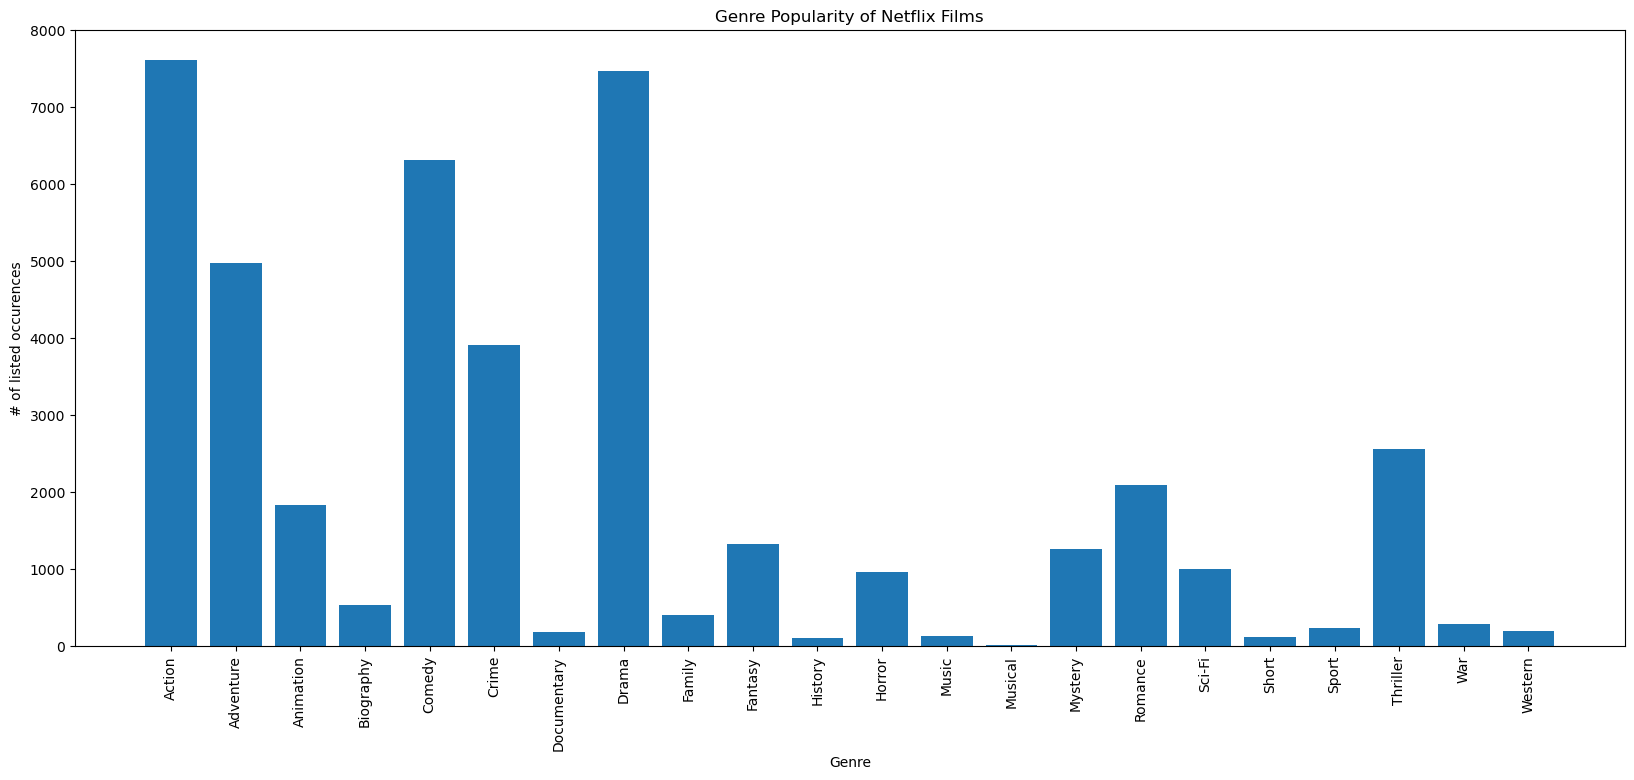

In [23]:
genre_type = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 
              'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport',
              'Thriller', 'War', 'Western']
#Found by adding together the number of occurences in each list above
total_genre_count = [7621, 4976, 1829, 536, 6322, 3907, 182, 7473, 408, 
                     1334, 110, 970, 137, 10, 1263, 2090, 997, 124, 238,
                     2567, 291, 192]
                     

plt.figure(figsize=(20,8))
plt.bar(genre_type, total_genre_count, align = "center")
tick_locations = [value for value in genre_type]
plt.xticks(tick_locations, genre_type, rotation = "vertical")
plt.xlabel("Genre")
plt.ylabel("# of listed occurences")
plt.title("Genre Popularity of Netflix Films")

plt.show()


The top 5 Netflix genres overall are:
1. Action
2. Drama
3. Comedy
4. Adventure
5. Crime

# Calculate Genre data for top 3 Netflix Countries: USA, UK, and Brazil

In [36]:
#Make dataframe and calculate genres for the USA
us_df = organized_genres_country.loc[organized_genres_country['country_name'] == 'United States']
us_counts = []
us1 = us_df['Genre 1'].value_counts()
us_counts.append(us1)
us2 = us_df['Genre 2'].value_counts()
us_counts.append(us2)
us3 = us_df['Genre 3'].value_counts()
us_counts.append(us3)
us4 = us_df['Genre 4'].value_counts()
us_counts.append(us4)
us_counts


[Action         40
 Comedy         24
 Animation      20
 Drama          15
 Crime           5
 Documentary     4
 Adventure       4
 Biography       3
 Mystery         2
 Family          2
 Horror          1
 Name: Genre 1, dtype: int64,
  Adventure    34
  Drama        26
  Crime        12
  Romance      12
  Thriller      7
  Fantasy       6
  Comedy        5
  War           3
  Horror        2
  Mystery       2
  Action        2
  Music         2
  Family        1
 Name: Genre 2, dtype: int64,
  Comedy       19
  Thriller     17
  Drama        12
  Mystery       6
  Crime         6
  Fantasy       5
  Romance       4
  Horror        4
  Family        3
  History       2
  Adventure     2
  Sport         2
  Western       2
 Name: Genre 3, dtype: int64,
 Series([], Name: Genre 4, dtype: int64)]

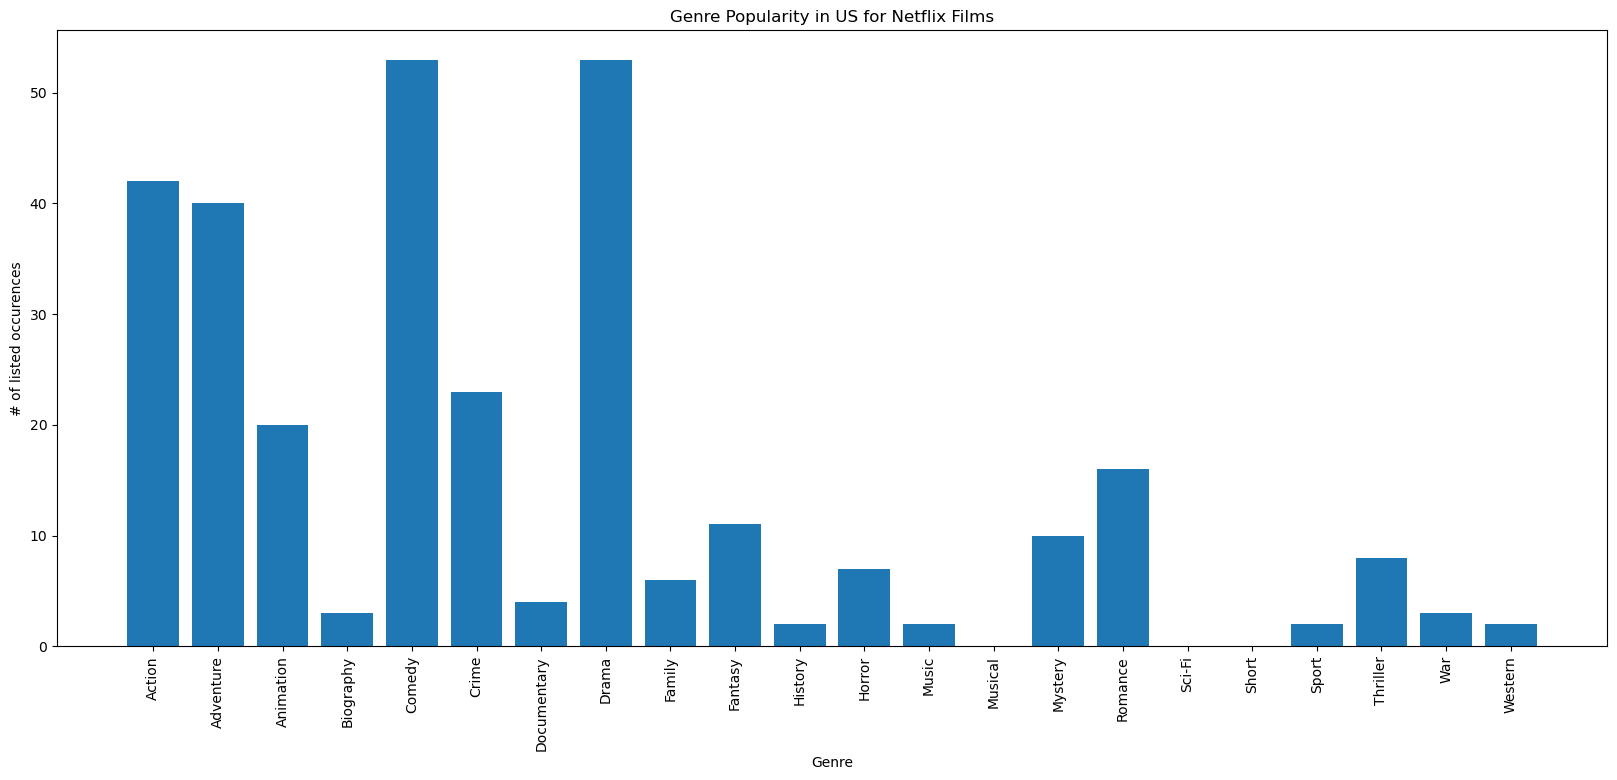

In [37]:
genre_type = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 
              'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport',
              'Thriller', 'War', 'Western']
#Found by adding together the number of occurences in each list above
us_genre_count = [42, 40, 20, 3, 53, 23, 4, 53, 6, 
                 11, 2, 7, 2, 0, 10, 16, 0, 0, 2,
                 8, 3, 2]
                    
plt.figure(figsize=(20,8))
plt.bar(genre_type, us_genre_count, align = "center")
tick_locations = [value for value in genre_type]
plt.xticks(tick_locations, genre_type, rotation = "vertical")
plt.xlabel("Genre")
plt.ylabel("# of listed occurences")
plt.title("Genre Popularity in US for Netflix Films")

plt.show()


In [40]:
#Make dataframe and calculate genres for the UK
uk_df = organized_genres_country.loc[organized_genres_country['country_name'] == 'United Kingdom']
uk_counts = []
uk1 = uk_df['Genre 1'].value_counts()
uk_counts.append(uk1)
uk2 = uk_df['Genre 2'].value_counts()
uk_counts.append(uk2)
uk3 = uk_df['Genre 3'].value_counts()
uk_counts.append(uk3)
uk4 = uk_df['Genre 4'].value_counts()
uk_counts.append(uk4)
uk_counts


[Action         80
 Comedy         33
 Animation      25
 Drama          12
 Crime          12
 Biography       6
 Documentary     4
 Adventure       3
 Horror          3
 Short           2
 Mystery         1
 Family          1
 Name: Genre 1, dtype: int64,
  Adventure    55
  Drama        40
  Crime        19
  Romance      13
  Comedy       11
  Thriller     11
  Sci-Fi        6
  Action        5
  Biography     5
  Fantasy       4
  War           3
  Horror        2
  History       2
  Western       1
  Mystery       1
 Name: Genre 2, dtype: int64,
  Thriller     32
  Comedy       27
  Drama        21
  Fantasy      13
  Sci-Fi       11
  Crime        10
  Adventure     5
  Romance       4
  Horror        3
  Sport         3
  Mystery       3
  Family        2
  Western       2
  War           1
  History       1
 Name: Genre 3, dtype: int64,
 Series([], Name: Genre 4, dtype: int64)]

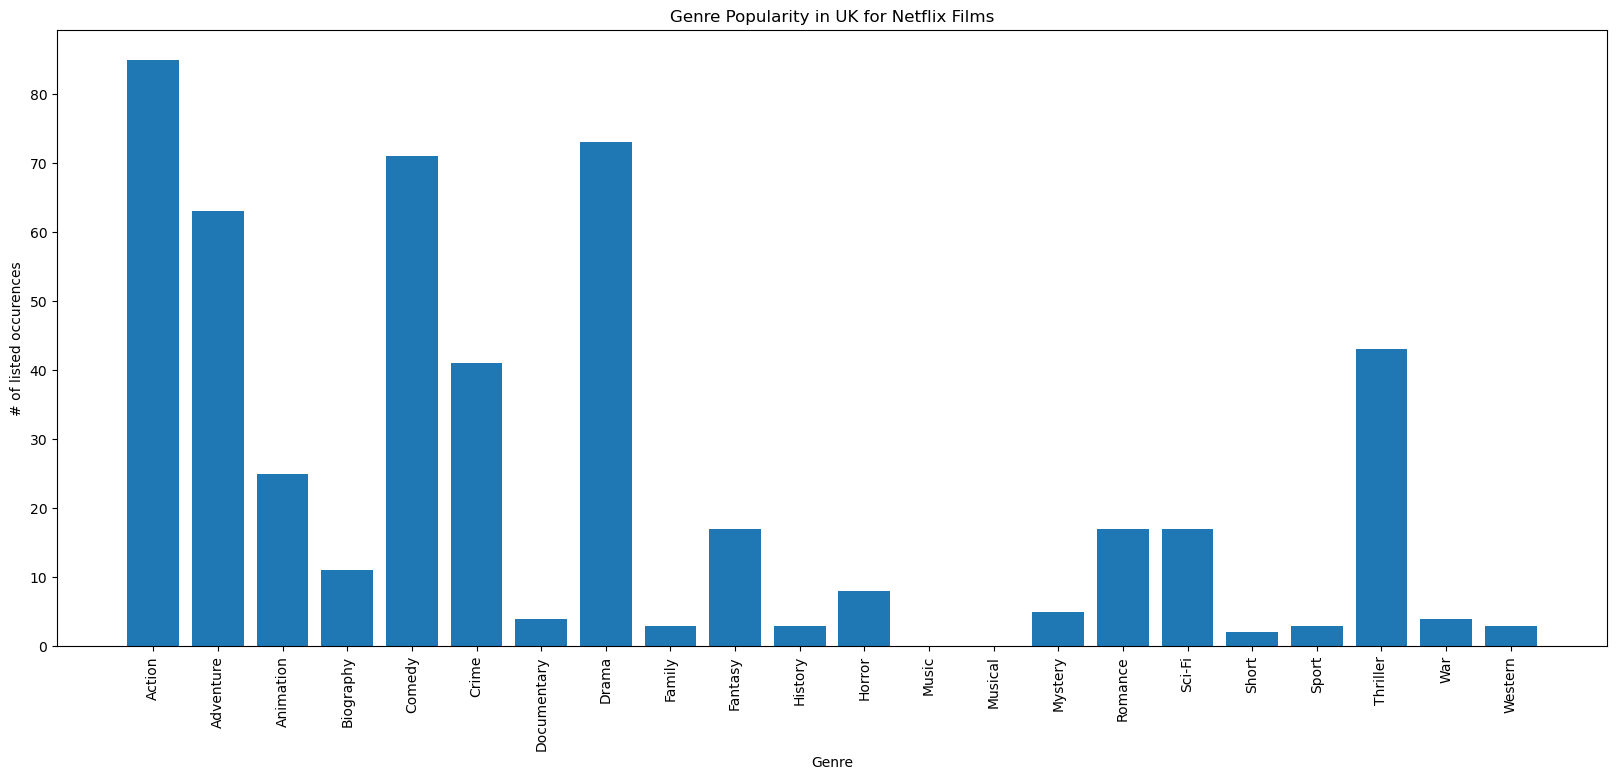

In [41]:
genre_type = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 
              'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport',
              'Thriller', 'War', 'Western']
#Found by adding together the number of occurences in each list above
uk_genre_count = [85, 63, 25, 11, 71, 41, 4, 73, 3, 
                  17, 3, 8, 0, 0, 5, 17, 17, 2, 3, 
                 43, 4, 3]
                 
plt.figure(figsize=(20,8))
plt.bar(genre_type, uk_genre_count, align = "center")
tick_locations = [value for value in genre_type]
plt.xticks(tick_locations, genre_type, rotation = "vertical")
plt.xlabel("Genre")
plt.ylabel("# of listed occurences")
plt.title("Genre Popularity in UK for Netflix Films")

plt.show()

In [42]:
#Make dataframe and calculate genres for Brazil
br_df = organized_genres_country.loc[organized_genres_country['country_name'] == 'Brazil']
br_counts = []
br1 = br_df['Genre 1'].value_counts()
br_counts.append(br1)
br2 = br_df['Genre 2'].value_counts()
br_counts.append(br2)
br3 = br_df['Genre 3'].value_counts()
br_counts.append(br3)
br4 = br_df['Genre 4'].value_counts()
br_counts.append(br4)
br_counts


[Action         71
 Comedy         34
 Animation      26
 Drama          17
 Crime           7
 Adventure       5
 Horror          5
 Biography       2
 Mystery         2
 Family          1
 Documentary     1
 Fantasy         1
 Name: Genre 1, dtype: int64,
  Adventure    41
  Drama        33
  Crime        24
  Romance      16
  Thriller     13
  Comedy       11
  Action        7
  Horror        6
  Mystery       4
  Fantasy       3
  War           2
  Family        1
  Short         1
  Sci-Fi        1
 Name: Genre 2, dtype: int64,
  Thriller     24
  Comedy       21
  Drama        21
  Sci-Fi       10
  Fantasy       9
  Crime         9
  Mystery       8
  Adventure     7
  Romance       3
  Family        3
  Western       2
  Horror        1
  Sport         1
 Name: Genre 3, dtype: int64,
 Series([], Name: Genre 4, dtype: int64)]

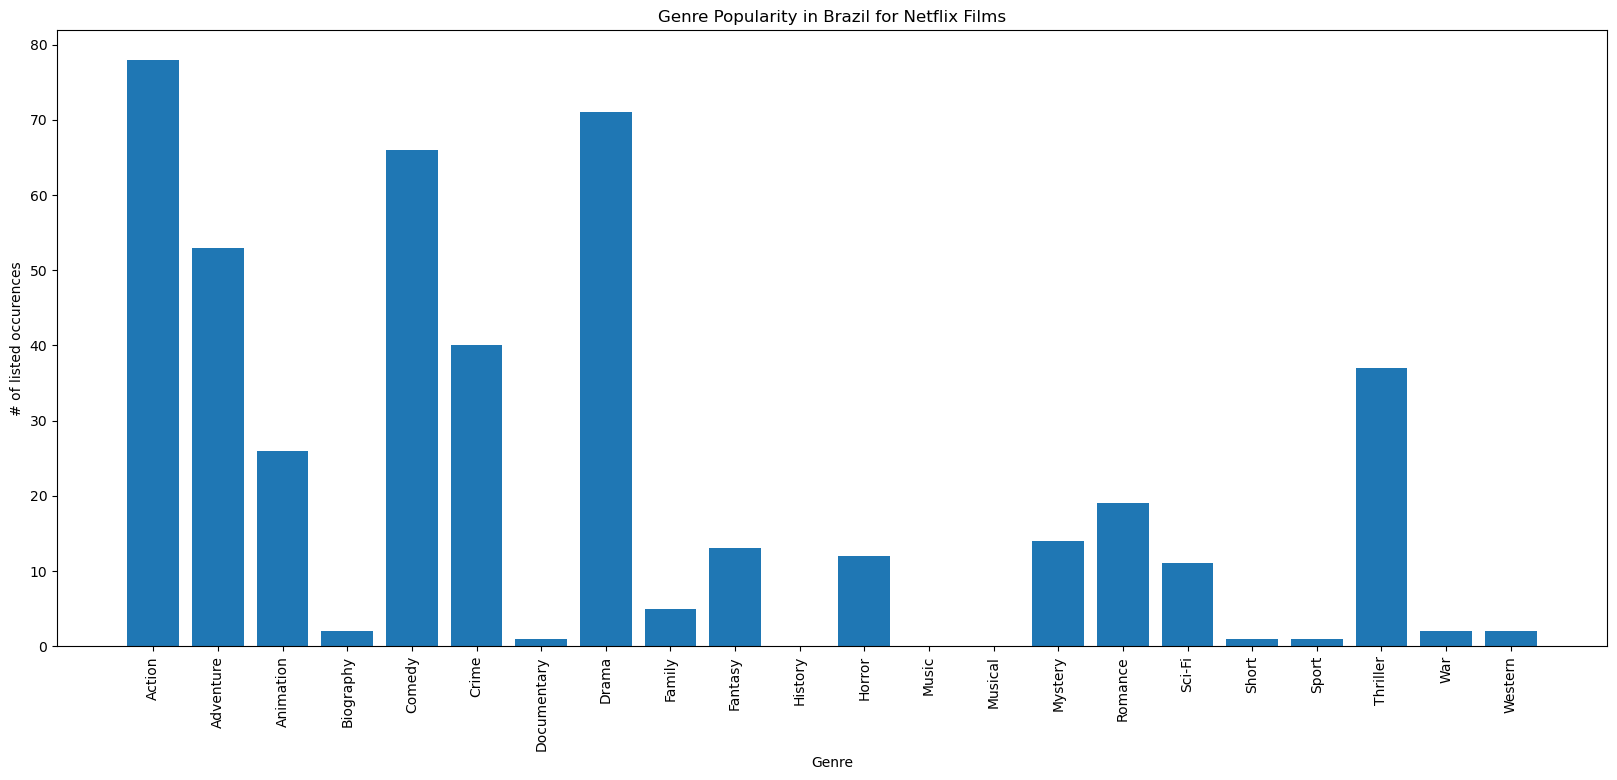

In [43]:
genre_type = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 
              'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport',
              'Thriller', 'War', 'Western']
#Found by adding together the number of occurences in each list above
br_genre_count = [78, 53, 26, 2, 66, 40, 1, 71, 5, 
                 13, 0, 12, 0, 0, 14, 19, 11, 1, 1, 
                 37, 2, 2]
                 
plt.figure(figsize=(20,8))
plt.bar(genre_type, br_genre_count, align = "center")
tick_locations = [value for value in genre_type]
plt.xticks(tick_locations, genre_type, rotation = "vertical")
plt.xlabel("Genre")
plt.ylabel("# of listed occurences")
plt.title("Genre Popularity in Brazil for Netflix Films")

plt.show()

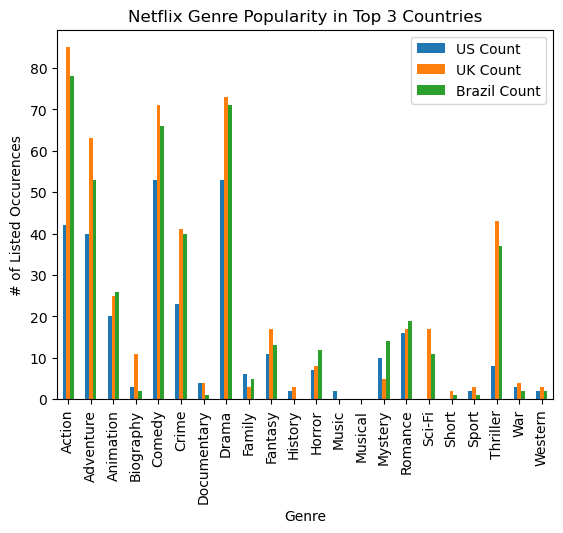

In [50]:
#plot all three countries together
genre_type = ['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 
              'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Sport',
              'Thriller', 'War', 'Western']
us_genre_count = [42, 40, 20, 3, 53, 23, 4, 53, 6, 
                 11, 2, 7, 2, 0, 10, 16, 0, 0, 2,
                 8, 3, 2]
uk_genre_count = [85, 63, 25, 11, 71, 41, 4, 73, 3, 
                  17, 3, 8, 0, 0, 5, 17, 17, 2, 3, 
                 43, 4, 3]

br_genre_count = [78, 53, 26, 2, 66, 40, 1, 71, 5, 
                 13, 0, 12, 0, 0, 14, 19, 11, 1, 1, 
                 37, 2, 2]
top3_df = pd.DataFrame({'Genre': genre_type,
                       'US Count': us_genre_count,
                       'UK Count': uk_genre_count,
                       'Brazil Count': br_genre_count})


top3_df.plot(x="Genre", y=["US Count", "UK Count", "Brazil Count"], kind="bar")
plt.title("Netflix Genre Popularity in Top 3 Countries")
plt.xlabel("Genre")
plt.ylabel("# of Listed Occurences")
plt.show()

Top 3 Genres for each country:
United States: 
    1st/2nd: Comedy and Drama are tied
    3rd: Action
United Kingdom: 
    1st: Action
    2nd: Drama
    3rd: Comedy
Brazil: 
    1st: Action
    2nd: Drama
    3rd: Comedy